In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

In [10]:
csv_opts = {'sep': '|',
            'quotechar': '"',
            'compression': 'gzip'}

In [11]:
srms1 = pd.read_csv('../input/srms-1.csv.gz', **csv_opts)
srms2 = pd.read_csv('../input/srms-2.csv.gz', **csv_opts)

In [12]:
srms1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   tracking_number                      371 non-null    int64  
 1   gender                               371 non-null    object 
 2   country_of_citizenship               371 non-null    object 
 3   facility_aor                         371 non-null    object 
 4   facility                             371 non-null    object 
 5   facility:detloc                      371 non-null    object 
 6   report_type                          371 non-null    object 
 7   placement_date                       371 non-null    object 
 8   placement_reason                     371 non-null    object 
 9   release_date                         357 non-null    object 
 10  length_of_stay                       0 non-null      float64
 11  disciplinary_infraction         

In [13]:
srms1.head()

,tracking_number,gender,country_of_citizenship,facility_aor,facility,facility:detloc,report_type,placement_date,placement_reason,release_date,...,additional_comments_export,non_compliance_detail,special_criteria,id,current_review,created,lgbti,item_type,placement_reason_type,detloc
0,12442,Male,MOROCCO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,14 Day,5/14/2018,Medical: Observation,5/29/2018,...,05/23/2018 05/14/2018 Detainee is under medica...,NaN,Yes,12442,14.0,5/23/2018,NaN,Item,Medical,CSCNWWA
1,12439,Male,ERITREA,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,14 Day,5/11/2018,Protective Custody: Other Detainee Safety,NaN,...,05/22/2018 Detainee has been housed in all ava...,NaN,No,12439,14.0,5/22/2018,NaN,Item,Protective Custody,CSCNWWA
2,12438,Male,INDIA,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,14 Day,5/20/2018,Facility Security Threat: Other,NaN,...,05/23/2018 Detainee placed in RHU pending SAAP...,NaN,Yes,12438,14.0,5/22/2018,NaN,Item,Facility Security Threat,CSCNWWA
3,12437,Male,RUSSIA,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,14 Day,5/19/2018,Disciplinary,NaN,...,05/23/2018 Detainee placed in RHU pending IDP ...,NaN,Yes,12437,14.0,5/22/2018,NaN,Item,Disciplinary,CSCNWWA
4,12436,Female,MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,4/30/2018,Facility Security Threat: Other,NaN,...,05/23/2018 Detainee returned from medical on 0...,NaN,Yes,12436,30.0,5/22/2018,NaN,Item,Facility Security Threat,CSCNWWA


In [14]:
srms2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   tracking_number                      467 non-null    object 
 1   gender                               467 non-null    object 
 2   country_of_citizenship               465 non-null    object 
 3   facility_aor                         467 non-null    object 
 4   facility                             467 non-null    object 
 5   facility:detloc                      467 non-null    object 
 6   report_type                          467 non-null    object 
 7   placement_date                       467 non-null    object 
 8   placement_reason                     467 non-null    object 
 9   release_date                         459 non-null    object 
 10  disciplinary_infraction              185 non-null    object 
 11  sanction_length                 

In [15]:
srms2.head()

,tracking_number,gender,country_of_citizenship,facility_aor,facility,facility:detloc,report_type,placement_date,placement_reason,release_date,...,non_compliance_detail,special_criteria,id,current_review,created,lgbti,custody_classification_level,additional_comments_export,placement_reason_type,detloc
0,"(b)(6),(b)(7)(c )",Male,MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,14 Day,3/16/2020,Facility Security Threat: Other,3/20/2020,...,NaN,Yes,"(b)(6), (b)(7)(C), (b)(7)(E)",14.0,3/23/2020,NaN,Medium - High,03/23/2020 Medical Overflow - suicidal thought...,Facility Security Threat,CSCNWWA
1,"(b)(6),(b)(7)(c )",Male,MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,2/13/2020,Pending Investigation of Disciplinary Violation,3/17/2020,...,NaN,No,"(b)(6), (b)(7)(C), (b)(7)(E)",30.0,3/6/2020,NaN,Medium - High,03/06/2020 Pending investigation for 222\n03/1...,Pending Disciplinary,CSCNWWA
2,"(b)(6),(b)(7)(c )",Male,EL SALVADOR,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,1/24/2020,Facility Security Threat: Other,3/10/2020,...,NaN,No,"(b)(6), (b)(7)(C), (b)(7)(E)",30.0,2/25/2020,NaN,Medium - High,02/25/2020 SAAPI Investigation\n,Facility Security Threat,CSCNWWA
3,"(b)(6),(b)(7)(c )",Male,MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,2/21/2020,Facility Security Threat: Other,3/6/2020,...,NaN,No,"(b)(6), (b)(7)(C), (b)(7)(E)",30.0,2/24/2020,NaN,Medium - High,02/24/2020 01/23/2020 Placed in admin RHU afte...,Facility Security Threat,CSCNWWA
4,"(b)(6),(b)(7)(c )",Male,MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,1/30/2020,Protective Custody: Other Detainee Safety,3/3/2020,...,NaN,No,"(b)(6), (b)(7)(C), (b)(7)(E)",30.0,2/24/2020,NaN,Medium - High,02/25/2020 Detainee requests PC. \n,Protective Custody,CSCNWWA


In [16]:
srms1['placement_date'] = pd.to_datetime(srms1['placement_date'])
srms1['release_date'] = pd.to_datetime(srms1['release_date'])
srms1['created'] = pd.to_datetime(srms1['created'])
srms2['placement_date'] = pd.to_datetime(srms2['placement_date'])
srms2['release_date'] = pd.to_datetime(srms2['release_date'])
srms2['created'] = pd.to_datetime(srms2['created'])

In [17]:
srms1_as = srms1.set_index('placement_date').groupby(pd.Grouper(freq='AS'))['tracking_number'].count()

In [18]:
srms2_as = srms2.set_index('placement_date').groupby(pd.Grouper(freq='AS'))['tracking_number'].count()

In [19]:
srms1_as - srms2_as

placement_date
2013-01-01    19.0
2014-01-01    12.0
2015-01-01    10.0
2016-01-01     4.0
2017-01-01     8.0
2018-01-01   -64.0
2019-01-01     NaN
2020-01-01     NaN
Freq: AS-JAN, Name: tracking_number, dtype: float64

In [10]:
srms1['created'].min()

Timestamp('2013-10-29 00:00:00')

In [11]:
srms1['created'].max()

Timestamp('2018-05-23 00:00:00')

In [12]:
srms2['created'].min()

Timestamp('2013-10-29 00:00:00')

In [13]:
srms2['created'].max()

Timestamp('2020-03-25 00:00:00')

In [14]:
srms1_start = str(srms1['placement_date'].min()).split()[0]

In [15]:
srms1_end = str(srms1['placement_date'].max()).split()[0]

In [16]:
srms2_equiv = srms2.set_index('placement_date').loc[srms1_start:srms1_end]

In [17]:
srms2_equiv_as = srms2_equiv.groupby(pd.Grouper(freq='AS'))['tracking_number'].count()

In [18]:
temp = (srms2_equiv_as - srms1_as).reset_index()

In [19]:
sum(srms2_equiv_as - srms1_as)

-56

In [20]:
temp['year'] = [x.year for x in temp['placement_date']]

In [21]:
temp = temp.drop('placement_date', axis=1)

In [22]:
temp = temp.rename({'tracking_number': 'diff_recs'}, axis=1)

In [23]:
print(temp.set_index('year'))

      diff_recs
year           
2013        -19
2014        -12
2015        -10
2016         -4
2017         -8
2018         -3


In [24]:
cols = ['gender', 'country_of_citizenship', 'placement_date', 'placement_reason']

In [25]:
srms2_equiv.reset_index(inplace=True)

In [26]:
temp = pd.merge(srms1, srms2_equiv, on=cols, how='outer', indicator=True)

In [27]:
temp['_merge'].value_counts()

both          416
left_only      56
right_only      3
Name: _merge, dtype: int64

In [28]:
temp_cols_x = list(temp.columns[temp.columns.str.endswith('_x')])
temp_cols_y = list(temp.columns[temp.columns.str.endswith('_y')])

In [29]:
temp_cols_x.extend(cols)
temp_cols_y.extend(cols)

In [30]:
second_only = temp.loc[temp['_merge'] == 'right_only', temp_cols_y]

In [31]:
first_only = temp.loc[temp['_merge'] == 'left_only', temp_cols_x]

In [32]:
# Makes some sense that these three records would be included in 2nd installment but not 1st
# because later release date; later creation date in one case.
second_only

,tracking_number_y,facility_aor_y,facility_y,facility:detloc_y,report_type_y,release_date_y,disciplinary_infraction_y,sanction_length_y,attorney_of_record_y,attorney_notification_y,...,current_review_y,created_y,lgbti_y,additional_comments_export_y,placement_reason_type_y,detloc_y,gender,country_of_citizenship,placement_date,placement_reason
472,"(b)(6),(b)(7)(c )",SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,2018-11-27,204 - Threatening another with bodily harm \n2...,30,No,No,...,300.0,2018-02-20,NaN,02/21/2018 Disciplinary - 109 Threats to Staff...,Facility Security Threat,CSCNWWA,Male,HONDURAS,2018-01-21,Facility Security Threat: Other
473,"(b)(6),(b)(7)(c )",SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,2018-10-02,108 Assault on Staff,30,Yes,Yes,...,210.0,2018-02-20,NaN,02/20/2018 Medical/Security Risk - Detainee co...,Disciplinary,CSCNWWA,Male,CANADA,2018-02-05,Disciplinary
474,"(b)(6),(b)(7)(c )",SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,2018-08-10,NaN,NaN,No,No,...,90.0,2018-06-20,NaN,06/20/2018 Detainee requested protective custo...,Protective Custody,CSCNWWA,Male,MEXICO,2018-05-18,Protective Custody: Other Detainee Safety


In [33]:
srms1['release_date'].max()

Timestamp('2018-05-31 00:00:00')

In [34]:
srms1['created'].max()

Timestamp('2018-05-23 00:00:00')

In [35]:
first_only['placement_date'].describe()

count                      56
unique                     54
top       2013-08-22 00:00:00
freq                        2
first     2013-05-13 00:00:00
last      2018-03-29 00:00:00
Name: placement_date, dtype: object

In [36]:
first_only['release_date_x'].describe()

count                      53
unique                     48
top       2013-09-25 00:00:00
freq                        2
first     2013-07-16 00:00:00
last      2018-05-03 00:00:00
Name: release_date_x, dtype: object

In [37]:
first_only['created_x'].describe()

count                      56
unique                     37
top       2013-10-29 00:00:00
freq                       18
first     2013-10-29 00:00:00
last      2018-04-24 00:00:00
Name: created_x, dtype: object

In [38]:
first_only['placement_reason'].value_counts()

Disciplinary                                                             20
Protective Custody: Other Detainee Safety                                12
Protective Custody: Gang Status (Protective Custody Only)                 8
Facility Security Threat: Other                                           6
Mental Illness                                                            3
Protective Custody: Criminal Offense (i.e. Sex Offender)                  2
Facility Security Threat: Gang Member Status (Not Protective Custody)     2
Pending Investigation of Disciplinary Violation                           1
Protective Custody: Special Vulnerability Other                           1
Facility Security Threat: Violent or Disruptive Behavior                  1
Name: placement_reason, dtype: int64

In [39]:
first_only['current_review_x'].describe()

count     54.00000
mean      77.00000
std      107.47356
min        3.00000
25%       14.00000
50%       30.00000
75%       82.50000
max      390.00000
Name: current_review_x, dtype: float64

In [40]:
srms1_g = srms1.set_index('placement_date').groupby([pd.Grouper(freq='AS')])['tracking_number'].count().reset_index()
srms2_g = srms2.set_index('placement_date').groupby([pd.Grouper(freq='AS')])['tracking_number'].count().reset_index()

In [41]:
srms1_g['installment'] = 1
srms2_g['installment'] = 2

In [42]:
data = pd.concat([srms1_g, srms2_g], axis=0)

In [43]:
data = data.set_index(['placement_date'])

In [44]:
data = data.rename({'tracking_number': 'placements'}, axis=1)

In [45]:
data = data.fillna(0)

In [46]:
data

,placements,installment
placement_date,,
2013-01-01,60,1
2014-01-01,82,1
2015-01-01,76,1
2016-01-01,42,1
2017-01-01,74,1
2018-01-01,37,1
2013-01-01,41,2
2014-01-01,70,2
2015-01-01,66,2


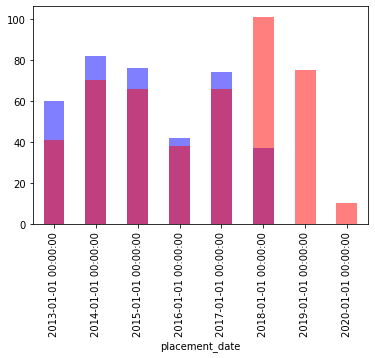

In [47]:
data.loc[data['installment'] == 1, 'placements'].plot(kind='bar', color='b', alpha=.5)
data.loc[data['installment'] == 2, 'placements'].plot(kind='bar', color='r', alpha=.5)

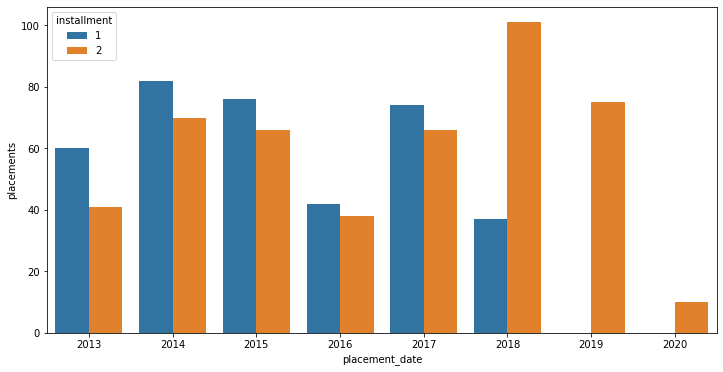

In [48]:
fig, ax = plt.subplots(figsize = (12,6))   
fig = sns.barplot(x=data.index, hue="installment", y="placements", data=data)
x_dates = data.index.sort_values().unique()
ax.set_xticklabels(labels=x_dates.year, rotation=0, ha='center')
plt.show()

In [49]:
srms1['days_solitary'] = (srms1['release_date'] - srms1['placement_date']) / np.timedelta64(1, 'D')
srms2['days_solitary'] = (srms2['release_date'] - srms2['placement_date']) / np.timedelta64(1, 'D')

In [50]:
srms1_g = srms1.set_index('placement_date').groupby([pd.Grouper(freq='AS')])['days_solitary'].median().reset_index()
srms2_g = srms2.set_index('placement_date').groupby([pd.Grouper(freq='AS')])['days_solitary'].median().reset_index()

In [51]:
srms1_g['installment'] = 1
srms2_g['installment'] = 2

data = pd.concat([srms1_g, srms2_g], axis=0)

In [52]:
data = data.set_index('placement_date')

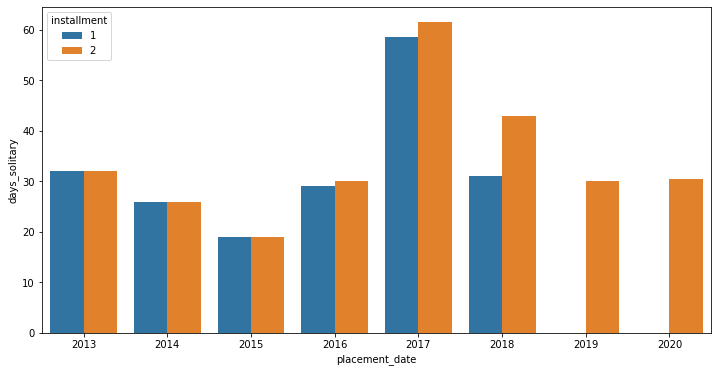

In [53]:
fig, ax = plt.subplots(figsize = (12,6))   
fig = sns.barplot(x=data.index, hue="installment", y="days_solitary", data=data)
x_dates = data.index.sort_values().unique()
ax.set_xticklabels(labels=x_dates.year, rotation=0, ha='center')
plt.show()

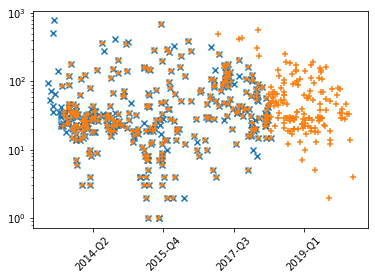

In [54]:
x=srms1.loc[:, 'placement_date'].astype(int)
y=srms1.loc[:,'days_solitary']

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x, y, alpha=1, marker='x')

x=srms2.loc[:, 'placement_date'].astype(int)
y=srms2.loc[:,'days_solitary']
plt.scatter(x, y, alpha=1, marker='+')

plt.yscale('log')

xticks = ax.get_xticks()
xticks_dates = [str(f'{pd.to_datetime(x).year}-Q{pd.to_datetime(x).quarter}') for x in xticks]
ax.set_xticklabels(xticks_dates,  rotation=45)
plt.show()
plt.close(fig=fig)
del fig, ax

In [72]:
srms1['placement_date'].min()

Timestamp('2013-05-13 00:00:00')

In [56]:
srms2['placement_date'].min()

Timestamp('2013-09-03 00:00:00')

In [62]:
srms1['installment'] = 1
srms2['installment'] = 2

In [68]:
srms2['placement_date'].min()

Timestamp('2013-09-03 00:00:00')

In [69]:
srms1['placement_date'].max()

Timestamp('2018-05-20 00:00:00')

In [102]:
both = pd.concat([srms1, srms2])

In [103]:
both = both.drop_duplicates(subset=['placement_date', 'days_solitary'], keep=False)
both = both.sort_values(by=['placement_date', 'installment'])

In [104]:
both.set_index(['placement_date'], inplace=True)

In [105]:
both = both.loc['2013-09-03':'2018-05-20']

In [106]:
len(both)

66

In [107]:
both = both[pd.notnull(both['release_date'])]

In [108]:
len(both)

52

In [109]:
sum(both['installment'] == 1)

38

In [99]:
both.reset_index().set_index(['placement_date', 'installment']).to_csv('../output/both_temp.csv')

In [117]:
set(both.loc[both['installment'] == 1, 'tracking_number'])

{447,
 540,
 1029,
 1591,
 1595,
 1728,
 1829,
 1939,
 2348,
 2372,
 2831,
 2869,
 2938,
 2990,
 3511,
 3771,
 3808,
 4314,
 4466,
 4736,
 5254,
 5341,
 5535,
 5627,
 6371,
 6614,
 7369,
 8460,
 9222,
 9361,
 9769,
 10125,
 11109,
 11110,
 11205,
 11397,
 11454,
 12139}